In [1]:
# STEP 2: Import libraries

# numpy: for handling vectors and matrix operations
import numpy as np

# matplotlib: for plotting the 2D visualization
import matplotlib.pyplot as plt

# sklearn.manifold.TSNE: for reducing high-dimensional vectors to 2D
from sklearn.manifold import TSNE


In [2]:
# Download GloVe embeddings (pretrained)
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2026-02-12 03:46:01--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2026-02-12 03:46:01--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2026-02-12 03:46:02--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [3]:
# Unzip the file
!unzip glove.6B.zip


Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [4]:
# Load glove.6B.100d embeddings into a dictionary

glove_file = "glove.6B.100d.txt"
embeddings = {}

with open(glove_file, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype="float32")
        embeddings[word] = vector

print("Vocabulary Size:", len(embeddings))

# Display one example vector
print("\nExample word:", "king")
print("Vector size:", len(embeddings["king"]))
print("Vector (first 10 values):", embeddings["king"][:10])


Vocabulary Size: 400000

Example word: king
Vector size: 100
Vector (first 10 values): [-0.32307 -0.87616  0.21977  0.25268  0.22976  0.7388  -0.37954 -0.35307
 -0.84369 -1.1113 ]


In [5]:
# STEP 4: Select 40–50 meaningful words

words = [
    # Animals
    "cat", "dog", "lion", "tiger", "elephant", "horse", "monkey", "rabbit",

    # Countries & cities
    "india", "china", "japan", "france", "germany", "italy",
    "paris", "london", "delhi", "mumbai", "tokyo", "berlin",

    # Technology
    "computer", "laptop", "phone", "internet", "software", "hardware",
    "keyboard", "mouse", "screen", "camera",

    # Education
    "school", "college", "university", "teacher", "student", "exam", "class",

    # Royal / people
    "king", "queen", "man", "woman", "prince", "princess",

    # Vehicles
    "car", "bus", "train", "bike", "airplane"
]

# Keep only words that exist in GloVe vocabulary
words = [w for w in words if w in embeddings]

print("Total words selected:", len(words))
print(words)


Total words selected: 48
['cat', 'dog', 'lion', 'tiger', 'elephant', 'horse', 'monkey', 'rabbit', 'india', 'china', 'japan', 'france', 'germany', 'italy', 'paris', 'london', 'delhi', 'mumbai', 'tokyo', 'berlin', 'computer', 'laptop', 'phone', 'internet', 'software', 'hardware', 'keyboard', 'mouse', 'screen', 'camera', 'school', 'college', 'university', 'teacher', 'student', 'exam', 'class', 'king', 'queen', 'man', 'woman', 'prince', 'princess', 'car', 'bus', 'train', 'bike', 'airplane']


In [6]:
# Extract vectors for selected words

vectors = np.array([embeddings[w] for w in words])
print("Vectors shape:", vectors.shape)


Vectors shape: (48, 100)


In [7]:
# STEP 5: Apply t-SNE for dimensionality reduction

tsne = TSNE(n_components=2, random_state=42, perplexity=10, max_iter=1000)
reduced_vectors = tsne.fit_transform(vectors)

print("Reduced shape:", reduced_vectors.shape)


Reduced shape: (48, 2)


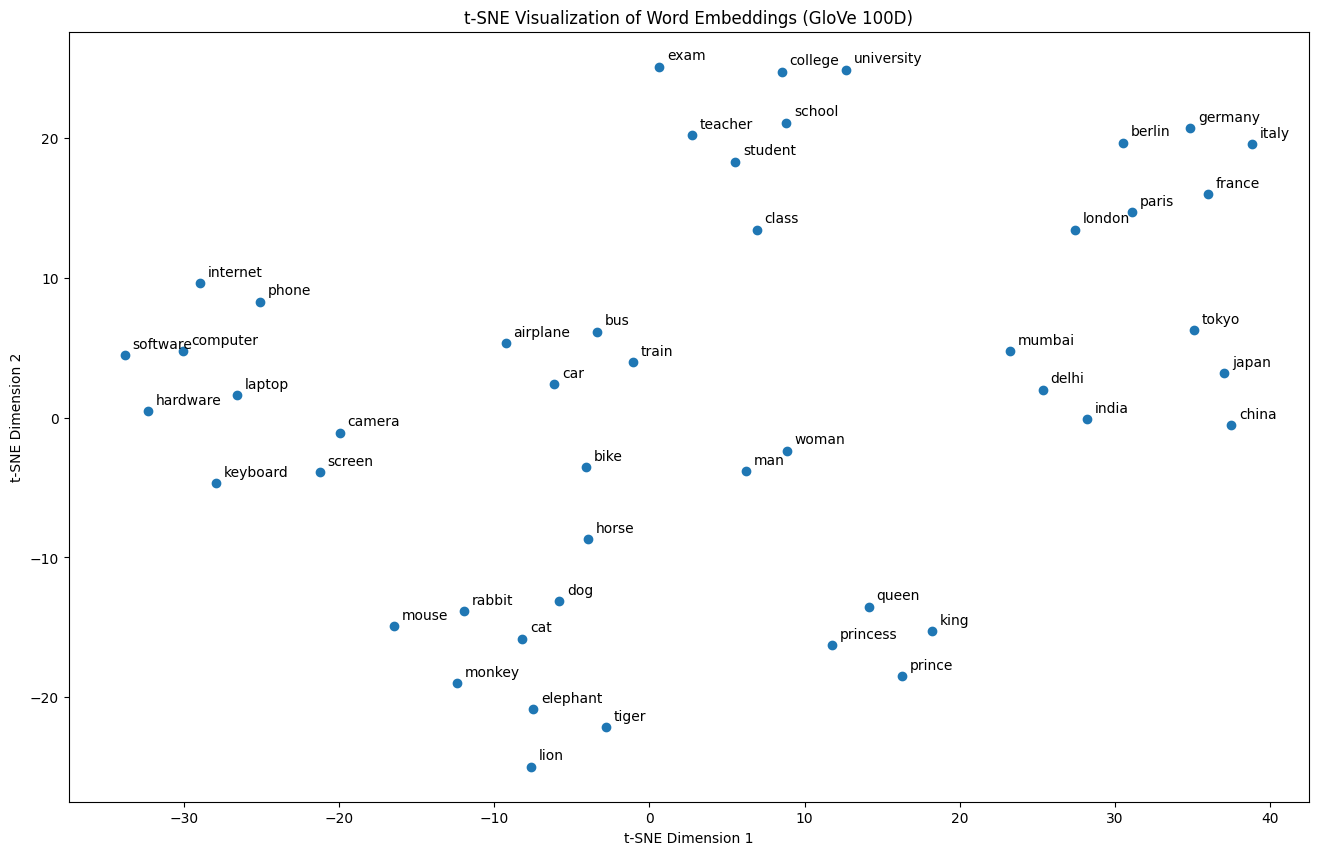

In [8]:
# STEP 6: Plot scatter plot with labels

plt.figure(figsize=(16, 10))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

for i, word in enumerate(words):
    plt.text(reduced_vectors[i, 0] + 0.5, reduced_vectors[i, 1] + 0.5, word)

plt.title("t-SNE Visualization of Word Embeddings (GloVe 100D)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In the t-SNE plot, words belonging to similar categories formed clusters.
Animal words like cat, dog, lion, and tiger appeared close to each other.
Country and city names like india, china, paris, and london formed another cluster.
Technology-related words such as computer, laptop, phone, and internet were grouped together.
Education words like school, college, university, teacher, and student were also placed nearby.
Vehicles like car, bus, train, and airplane formed a separate group.
This shows that embeddings capture semantic similarity based on usage in text.
Some words appeared slightly away from their expected cluster due to mixed usage in language.
Overall, the plot clearly shows embeddings create meaningful relationships between words.

In this lab, I used pretrained GloVe embeddings glove.6B.100d.
These embeddings were trained on Wikipedia and Gigaword text.
Each word is represented as a 100-dimensional vector.
The vector captures the meaning of the word based on surrounding context.
Similar words have similar vectors and appear closer in embedding space.
The embeddings were visualized using t-SNE in 2D.